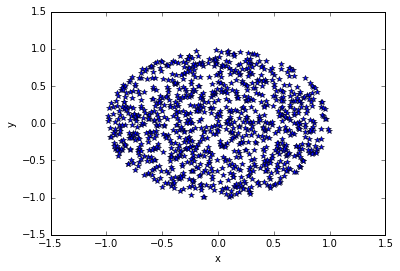

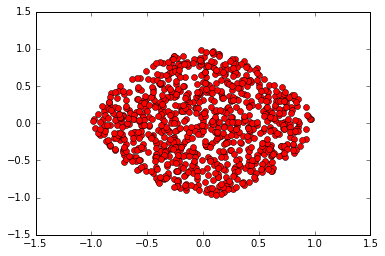

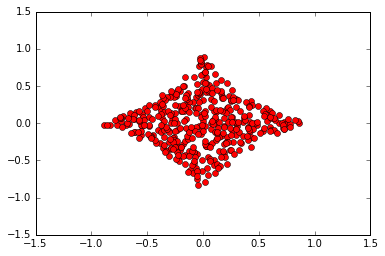

Acceptance rate is 0.86900 when p=1.5
Acceptance rate is 0.41100 when p=0.7


In [6]:
__author__ = 'demetyalman'
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random
import math

# Create N random samples in (0,1)
N = 1000

# we need to generate samples for R and Theta first
R = []
Theta = []

for i in range(N):
    R.append(math.sqrt(random.uniform(0,1)))

for i in range(N):
    # since theta ~ (0, 2*pi)
    Theta.append(random.uniform(0, 2*math.pi))

# Now, we need to obtain polar coordinates (x,y)
# x = r*cos(theta)  and  y = r*sin(theta)
x = []
y = []

for i in range(N):
    x.append(R[i] * math.cos(Theta[i]))
    y.append(R[i] * math.sin(Theta[i]))


#plot answer of the 1st question
plt.plot(x, y,'b*')
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.xlabel('x')
plt.ylabel('y')
plt.show()


p = [1.5, 0.7]

# p-norm
def p_norm(x, y, p):
    return math.pow( math.pow(math.fabs(x),p) + math.pow(math.fabs(y),p), (1/p) )

# inequality p_norm <= 1
def acceptance_condition(pnorm):
    if pnorm <= 1:
        return 1
    else:
        return 0

# to keep accepted samples
accepted_x = []
accepted_y = []

# for two different  p values
accepted_x.append([])
accepted_x.append([])

accepted_y.append([])
accepted_y.append([])

# for each p value, obtain accepted x and y values which fulfill the condition
for i in range(len(p)):
    for j in range(len(x)):
        if acceptance_condition(p_norm(x[j], y[j], p[i])) == 1 :
            accepted_x[i].append(x[j])
            accepted_y[i].append(y[j])

# plot
for i in range(2):
    plt.plot(accepted_x[i],accepted_y[i],'ro')
    plt.axis([-1.5, 1.5, -1.5, 1.5])
    plt.show()

# acceptance rate
acceptance_rate = [0.0,0.0]


for i in range(len(p)):
    # number of accepted samples / total number of samples
    acceptance_rate[i] = float(len(accepted_x[i])) / len(x)
    print "Acceptance rate is %.5f when p=%.1f" %(acceptance_rate[i], p[i])


#plot
#plt.plot(accepted_x, accepted_y,'r*')
#plt.axis([-1.5, 1.5, -1.5, 1.5])
#plt.xlabel('x')
#plt.ylabel('y')
#plt.show()
